In [3]:
print ("Tarea 3 Dataset de Regresión Logística")

Tarea 3 Dataset de Regresión Logística


In [4]:
#Hacemos el cargue de las librerias para comenzar con el trabajo.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Hacemos el cargue del Dataset de enfermedad cardiaca y realizaremos la lectura del mismo

In [9]:
archivo= pd.read_csv(filepath_or_buffer = "/Users/Cristin/.ipynb_checkpoints/Heart.csv")

In [48]:
archivo.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [15]:
#Realizamos la descripción de los datos

In [16]:
archivo.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [23]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [44]:
archivo.shape

(297, 14)

In [17]:
#Realizamos la identificación de los datos, para encontrar valores faltantes o atípicos en cada fila

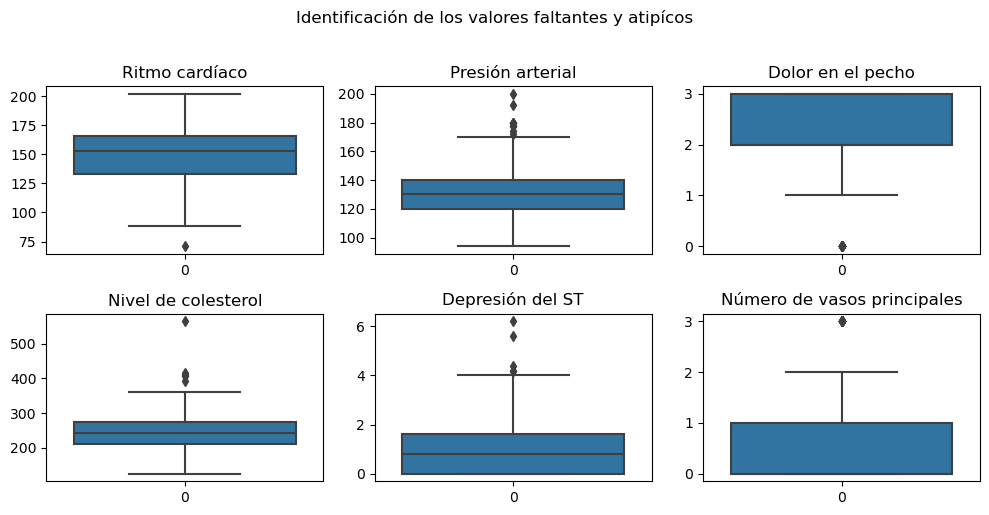

In [41]:
fig, axs = plt.subplots(2,3, figsize =(10,5))
plt1 = sns.boxplot(archivo['thalach'], ax = axs[0,0]).set_title('Ritmo cardíaco')
plt2 = sns.boxplot(archivo['trestbps'], ax = axs[0,1]).set_title('Presión arterial')
plt3 = sns.boxplot(archivo['cp'], ax = axs[0,2]).set_title('Dolor en el pecho')
plt1 = sns.boxplot(archivo['chol'], ax = axs[1,0]).set_title('Nivel de colesterol')
plt2 = sns.boxplot(archivo['oldpeak'], ax = axs[1,1]).set_title('Depresión del ST')
plt3 = sns.boxplot(archivo['ca'], ax = axs[1,2]).set_title('Número de vasos principales')
fig.suptitle('Identificación de los valores faltantes y atipícos', y=1.02)
plt.tight_layout()
plt.show()


In [67]:
#Reprocesamos los datos, para limpiarlos y tratar los valores faltantes segun sea lo necesario

In [68]:
#Revisamos los valores faltantes en todas las filas

In [51]:
pd.isnull(archivo["age"]).values.ravel().sum()

0

In [52]:
pd.isnull(archivo["sex"]).values.ravel().sum()

0

In [53]:
pd.isnull(archivo["cp"]).values.ravel().sum()

0

In [54]:
pd.isnull(archivo["trestbps"]).values.ravel().sum()

0

In [55]:
pd.isnull(archivo["chol"]).values.ravel().sum()

0

In [56]:
pd.isnull(archivo["fbs"]).values.ravel().sum()

0

In [58]:
pd.isnull(archivo["restecg"]).values.ravel().sum()

0

In [59]:
pd.isnull(archivo["thalach"]).values.ravel().sum()

0

In [61]:
pd.isnull(archivo["exang"]).values.ravel().sum()

0

In [62]:
pd.isnull(archivo["oldpeak"]).values.ravel().sum()

0

In [63]:
pd.isnull(archivo["slope"]).values.ravel().sum()

0

In [64]:
pd.isnull(archivo["ca"]).values.ravel().sum()

0

In [65]:
pd.isnull(archivo["thal"]).values.ravel().sum()

0

In [66]:
pd.isnull(archivo["condition"]).values.ravel().sum()

0

In [71]:
#Seleccionamos las características más relevantes para entrenar el modelo utilizando selección de características.

In [76]:
#La columna o variable objetivo es la presencia de enfermedad cardíaca.
# "1" hace referencia a que la persona TIENE diabetes
# "0" hace referencia a que la persona NO tiene diabetes

In [74]:
archivo['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [75]:
archivo[['condition']].head(38)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [78]:
#Haremos la división del Dataset en datos train y test para evaluar el modelo.
#Para el train escogeremos el 75% y para el test el 25%, asi escogeremos (x) y (y)

In [85]:
X =archivo.drop('condition', axis=1) #cargaremos todas las columnas excepto la de condición
Y =archivo['condition'] #cargaremos solo la columna de condición
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [84]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [86]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [87]:
#Entrenamos el modelo configurando los diferentes hiperparámetros.

In [95]:
Tarea3_Regresion = LogisticRegression(solver ="liblinear")
Tarea3_Regresion.fit (X_train , Y_train)

prediccion = Tarea3_Regresion.predict(X_test)

In [96]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [97]:
print (prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [98]:
#Evaluamos el desempeño del modelo en el conjunto de Test con métrica coo presición, recall,F1-score, etc

In [99]:
print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [100]:
#Realizamos las diferentes gráficas que permitiran visualizar los resultados del modelo.

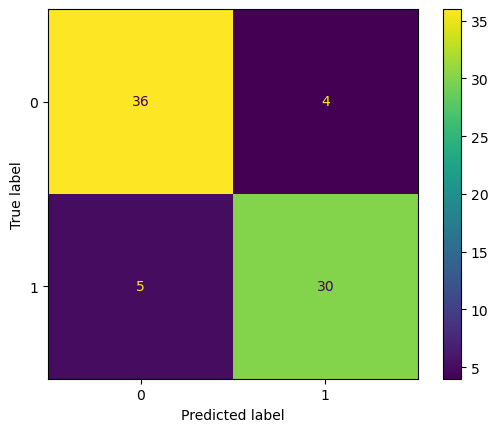

In [105]:
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

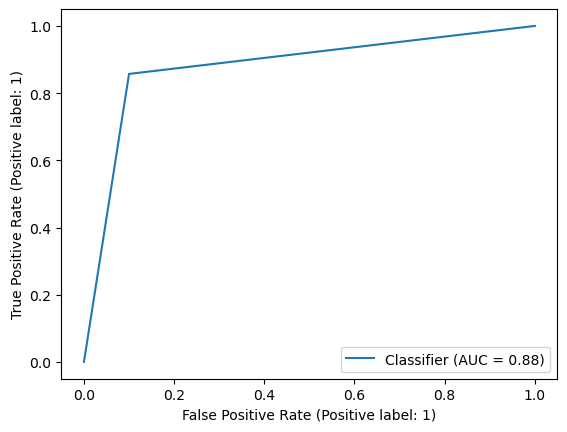

In [108]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test , prediccion)
plt.show()